<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [5]:
advert = pd.read_csv('../Documents/GitHub/Study/Data Science/Datasets/Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [7]:
advert.drop(labels='Unnamed: 0',axis=1,inplace=True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 4: Exploratory Data Analysis

/home/hashem/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

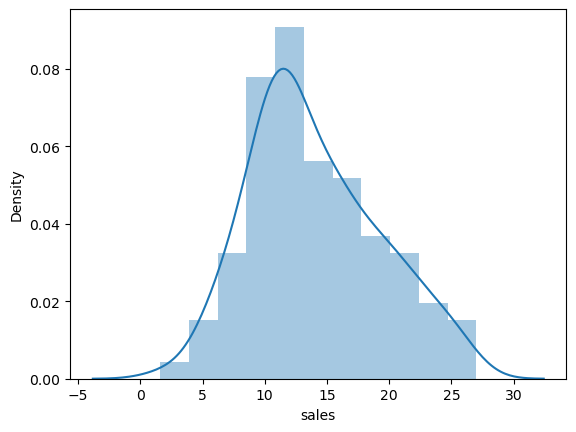

In [19]:
sns.distplot(advert.sales)

/home/hashem/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

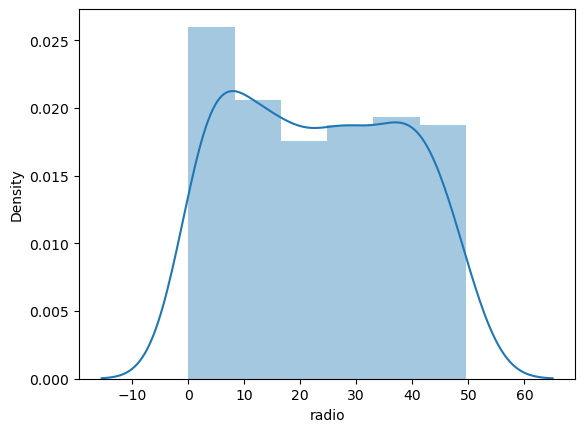

In [18]:
sns.distplot(advert.radio)

/home/hashem/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

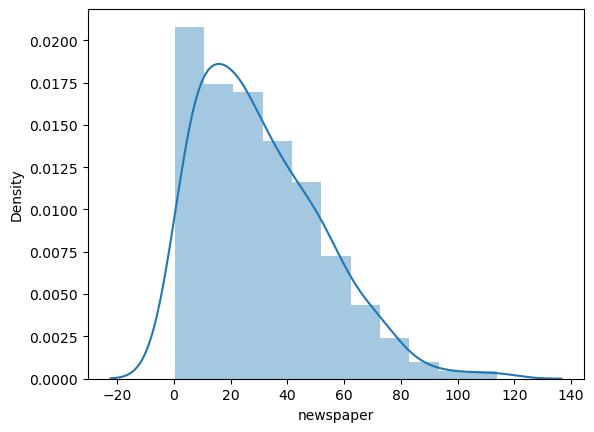

In [17]:
sns.distplot(advert.newspaper)

/home/hashem/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

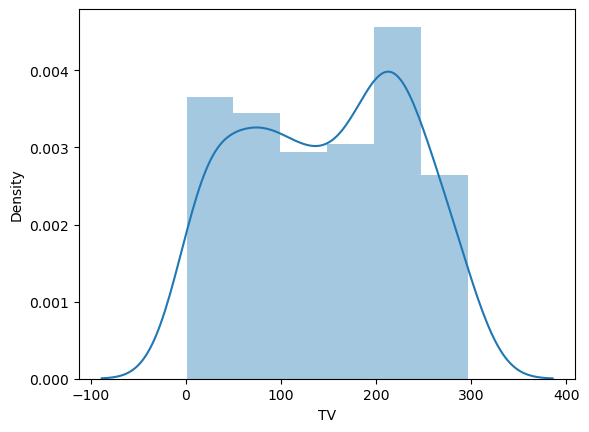

In [16]:
sns.distplot(advert.TV)

### Task 5: Exploring Relationships between Predictors and Response

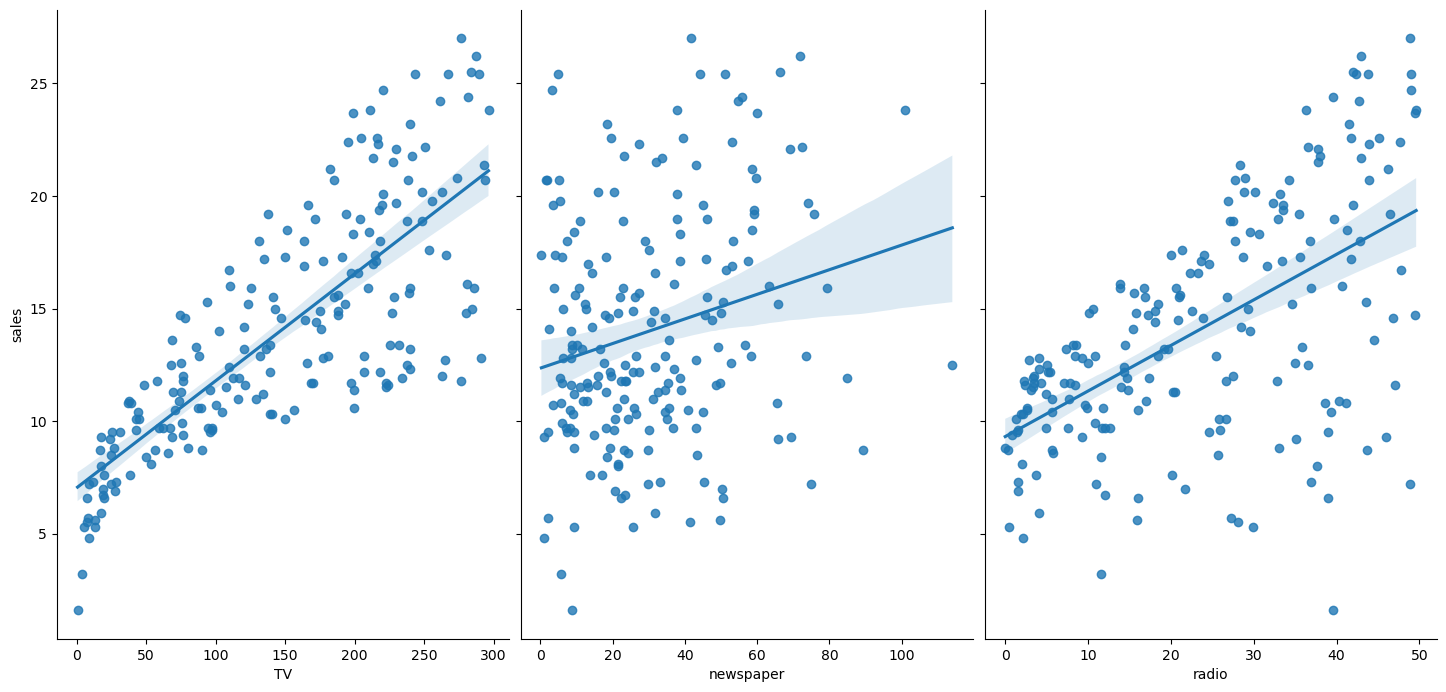

In [23]:
sns.pairplot(data=advert,
             x_vars=['TV','newspaper','radio'],
             y_vars='sales',
             kind='reg',
             height=7,
             aspect=0.7
             )

In [24]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

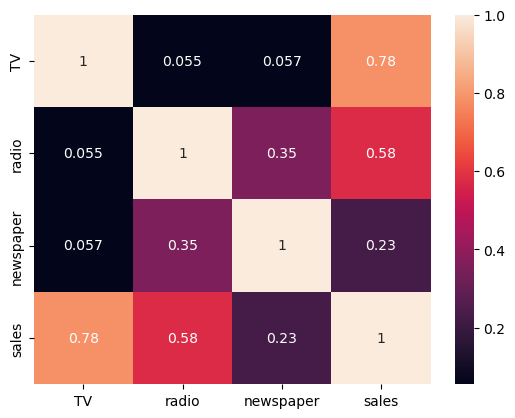

In [25]:
sns.heatmap(advert.corr(), annot=True)

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [26]:
X = advert.TV.to_frame()

y = advert.sales

In [27]:
X.shape

(200, 1)

In [28]:
y.shape

(200,)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [32]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(x_train,y_train)

LinearRegression()

* Note the 75% to 25% split. 

### Task 7: Interpreting Model Coefficients

In [33]:
linreg.intercept_

6.91197261886872

In [34]:
linreg.coef_

array([0.04802945])

### Task 8: Making Predictions with our Model

In [44]:
y_pred = linreg.predict(x_test)
y_pred

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719, 10.30285179, 17.25751616,
       14.81281715, 10.23561056, 17.22389554, 12.18560623, 17.75702244,
       12.94927449, 13.23745119, 20.87413375,  8.14152654, 17.03177774,
       11.7341294 , 10.16836933,  8.11751182, 12.07033555, 12.33449753,
       15.96072101,  8.98204192, 18.86169979, 14.92328489, 18.44384358,
       18.43423769, 18.17487866, 14.10198129, 15.08658502, 18.84248801,
       15.79261793, 17.59372231, 13.12698346, 17.32475739,  7.85334984,
        7.54115841, 11.2538349 ,  7.81012333, 16.71478337,  7.2625876 ,
       13.98671061, 10.66787561, 17.86268723, 16.75800988, 17.9347314 ])

### Task 9: Model Evaluation Metrics

In [46]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [51]:
summ = 0
for i in range(len(true)):
    summ+= abs(true[i] - pred[i])
    
summ/len(true)

10.0

In [50]:
# Using sklearn:
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [52]:
metrics.mean_squared_error(pred,true)

150.0

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [54]:
np.sqrt(metrics.mean_squared_error(pred,true))

12.24744871391589

* Computing the MSE for our dataset:

In [55]:
metrics.mean_squared_error(y_test,y_pred)

10.310069587813155